# WHY Ensemble ?  

Ensembles are a powerful concept in ML, able to take multiple individual models, each one performing well in some subspace, and combine them in such a way that the overall model is (somehow, and ideally) best in all subspaces. Yet they are woefully underutilized in data science. The reason is because most data scientists are either (a) untrained in their use, or more importantly, (b) decide implicitly that the cost of using an ensemble is not worth the gain in performance, compared to the energy needed to just “train a better model”. There is nothing fundamental about this choice: it’s the result of the current state of tooling in data science/machine learning.



# What is H1ST Ensemble ? 
In H1ST platform, we want to provid an easy way to use Ensemble to Data Scientist.  
You can use h1st Ensemble with h1st models that includes ML/DL models from various AI platforms such as SKLearn and Tensorflow.

# How to use H1st Ensemble ?
1. We will first define/train two h1st example models (You can use N models with h1st Ensemble).
2. We will import RandomForestStackEnsembleClassifier from h1st.
3. Defind load_data and prep_data functions of RandomForestStackEnsembleClassifier
4. Train and evaluate the ensemble

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import os

import pandas as pd

import h1st as h1
h1.init()
from Ensemble.models.submodel_examples import SK_SVM_Classifier, TF_FC_Classifier
import Ensemble.config as config

## Submodel_1 - SVM

In [9]:
h1_sk_svm = SK_SVM_Classifier()
data = h1_sk_svm.load_data()

(20100, 23) (9900, 23) (20100, 1) (9900, 1)


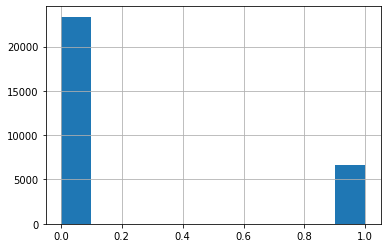

In [24]:
h1_sk_svm.explore(data)

In [ ]:
prepared_data = h1_sk_svm.prep_data(data)

In [10]:
h1_sk_svm.train(prepared_data)

/Users/arimo/Desktop/jupyter/py3_venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [11]:
h1_sk_svm.evaluate(prepared_data)
h1_sk_svm.metrics

{'accuracy': 0.8143434343434344}

In [12]:
h1_sk_svm.persist('my_sk_svm')

2020-08-24 15:02:53,423 INFO h1st.model_repository.model_repository: Saving metrics property...
2020-08-24 15:02:53,424 INFO h1st.model_repository.model_repository: Saving stats property...
2020-08-24 15:02:53,432 INFO h1st.model_repository.model_repository: Saving model property...


'my_sk_svm'

## Submodel_2 - Fully Connected Neural Net

In [33]:
h1_tf_fc = TF_FC_Classifier()
data = h1_tf_fc.load_data()
prepared_data = h1_tf_fc.prep_data(data)

(20100, 23) (9900, 23) (20100, 1) (9900, 1)


In [34]:
h1_tf_fc.train(prepared_data)

In [35]:
h1_tf_fc.evaluate(prepared_data)
h1_tf_fc.metrics

(9900, 1) (9900, 1)


{'accuracy': 0.816060606060606}

In [38]:
h1_tf_fc.persist('my_tf_fc')

2020-08-24 15:13:46,848 INFO h1st.model_repository.model_repository: Saving metrics property...
2020-08-24 15:13:46,849 INFO h1st.model_repository.model_repository: Saving stats property...
2020-08-24 15:13:46,850 INFO h1st.model_repository.model_repository: Saving model property...


'my_tf_fc'

## H1ST StackEnsemble

In [39]:
from sklearn.model_selection import train_test_split
from h1st import RandomForestStackEnsembleClassifier

class RandomForestStackEnsembleClassifier(RandomForestStackEnsembleClassifier):
    def load_data(self,):
        df = pd.read_excel(config.DATA_PATH, header=1)
        return df

    def prep_data(self, loaded_data):
        """
        Prepare data for modelling
        :param loaded_data: data return from load_data method
        :returns: dictionary contains train data and test data
        """
        df = loaded_data
        X = df[config.DATA_FEATURES].values
        y = df[config.DATA_TARGETS].values
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.33, shuffle=True, random_state=10)
        print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
        
        return {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test
        }

rf_stack_ensemble = RandomForestStackEnsembleClassifier(
    [SK_SVM_Classifier().load('my_sk_svm'), TF_FC_Classifier().load('my_tf_fc')])

2020-08-24 15:13:50,185 INFO h1st.model_repository.model_repository: Loading version my_sk_svm ....
2020-08-24 15:13:50,219 INFO h1st.model_repository.model_repository: Loading version my_tf_fc ....


In [40]:
data = rf_stack_ensemble.load_data()
prepared_data = rf_stack_ensemble.prep_data(data)

(20100, 23) (9900, 23) (20100, 1) (9900, 1)


In [41]:
rf_stack_ensemble.train(prepared_data)

(20100, 23) (20100, 1) (20100, 1)


In [42]:
rf_stack_ensemble.evaluate(prepared_data)

(9900, 23) (9900, 1) (9900, 1)


{'confusion_matrix': array([[7324,  346],
        [1451,  779]]),
 'recall': array([0.95488918, 0.34932735]),
 'f1': array([0.89072666, 0.46438152]),
 'support': array([7670, 2230]),
 'accuracy': 0.8184848484848485}